<a href="https://colab.research.google.com/github/rev2018/google-play-store-analytics/blob/main/google-play-store-analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload CSV files manually
uploaded = files.upload()


Saving googleplaystore.csv.csv to googleplaystore.csv.csv
Saving googleplaystore_user_reviews.csv.csv to googleplaystore_user_reviews.csv.csv
Saving license.csv.txt to license.csv.txt


In [ ]:
import os
print(os.listdir())  # This will list all uploaded files


['.config', 'googleplaystore.csv.csv', 'heart-disease.csv.csv', 'googleplaystore_user_reviews.csv.csv', 'license.csv.txt', 'sample_data']


In [13]:
import pandas as pd

# Load the datasets with correct filenames
apps_df = pd.read_csv("googleplaystore.csv.csv")
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv.csv")

# Display the first few rows
print(apps_df.head())
print(reviews_df.head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [14]:

# Check for missing values
print(apps_df.isnull().sum())
print(reviews_df.isnull().sum())


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [18]:
# Avoid FutureWarning by using direct assignment
apps_df = apps_df.copy()  # Ensure we're working with the original dataframe

apps_df['Rating'] = apps_df['Rating'].fillna(apps_df['Rating'].median())
apps_df['Type'] = apps_df['Type'].fillna("Free")
apps_df['Content Rating'] = apps_df['Content Rating'].fillna(apps_df['Content Rating'].mode()[0])
apps_df['Current Ver'] = apps_df['Current Ver'].fillna("Unknown")
apps_df['Android Ver'] = apps_df['Android Ver'].fillna("Unknown")

# Drop missing reviews
reviews_df = reviews_df.dropna()



In [19]:
print(apps_df.isnull().sum())
print(reviews_df.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


<ipython-input-21-7112b042c7d5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].str.replace(",", "").str.replace("+", "").astype(int)
<ipython-input-21-7112b042c7d5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace("$", "").astype(float)
<ipython-input-21-7112b042c7d5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

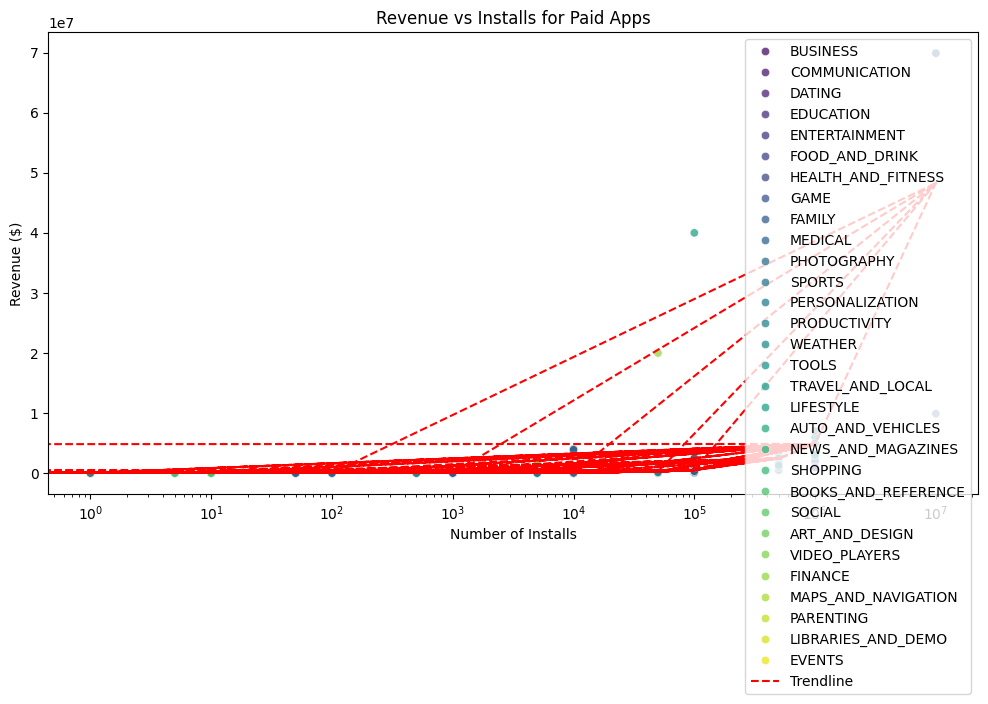

In [21]:
#task 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("googleplaystore.csv.csv")

# Data Cleaning & Filtering
# Remove rows with missing values in relevant columns
df = df.dropna(subset=['Type', 'Installs', 'Price', 'Category'])

# Keep only paid apps
df = df[df['Type'] == 'Paid']

# Convert 'Installs' column to numeric (remove commas and plus signs)
df['Installs'] = df['Installs'].str.replace(",", "").str.replace("+", "").astype(int)

# Convert 'Price' column to numeric (remove dollar sign)
df['Price'] = df['Price'].str.replace("$", "").astype(float)

# Calculate Revenue
df['Revenue'] = df['Price'] * df['Installs']

# Plot Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df['Installs'],
    y=df['Revenue'],
    hue=df['Category'],  # Color by category
    palette='viridis',
    alpha=0.75
)

# Add a trendline
z = np.polyfit(df['Installs'], df['Revenue'], 1)
p = np.poly1d(z)
plt.plot(df['Installs'], p(df['Installs']), "r--", label="Trendline")

# Labels and Title
plt.xlabel("Number of Installs")
plt.ylabel("Revenue ($)")
plt.title("Revenue vs Installs for Paid Apps")
plt.legend()
plt.xscale("log")  # Use log scale for better visualization
plt.show()


In [25]:
# Ensure 'Installs' column is a string type before applying string functions
df_apps['Installs'] = df_apps['Installs'].astype(str)

# Remove non-numeric values and make a clean copy
df_apps = df_apps[df_apps['Installs'].str.replace('[+,]', '', regex=True).str.isnumeric()].copy()

# Convert 'Installs' column to float
df_apps['Installs'] = df_apps['Installs'].str.replace('[+,]', '', regex=True).astype(float)




In [26]:
# task 2
import pandas as pd
import plotly.express as px
import datetime

# Step 1: Filter the data
# Exclude categories starting with 'A', 'C', 'G', or 'S'
excluded_categories = ['A', 'C', 'G', 'S']
df_apps = df_apps[~df_apps['Category'].str.startswith(tuple(excluded_categories))]

# Aggregate installs by category
category_installs = df_apps.groupby('Category', as_index=False)['Installs'].sum()

# Select top 5 categories
top_categories = category_installs.nlargest(5, 'Installs')

# Merge back to original data to filter rows
df_top = df_apps[df_apps['Category'].isin(top_categories['Category'])]

# Step 2: Ensure 'Country' column exists (replace if necessary)
if 'Country' not in df_top.columns:
    df_top['Country'] = 'Unknown'  # Replace with actual country data if available

# Step 3: Create Choropleth map only if within time range (6 PM - 8 PM IST)
current_time = datetime.datetime.utcnow() + datetime.timedelta(hours=5, minutes=30)  # Convert to IST

if 18 <= current_time.hour < 20:
    fig = px.choropleth(
        df_top,
        locations="Country",
        locationmode="country names",
        color="Installs",
        hover_name="Category",
        title="Global App Installs by Category (Top 5)",
        color_continuous_scale="Viridis"
    )
    fig.show()
else:
    print("Choropleth map is only available between 6 PM - 8 PM IST.")


Choropleth map is only available between 6 PM - 8 PM IST.


In [27]:

# task 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
df_apps = pd.read_csv("googleplaystore.csv.csv")

# Convert 'Installs' to numeric
df_apps['Installs'] = df_apps['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df_apps = df_apps[df_apps['Installs'].str.isnumeric()].copy()
df_apps['Installs'] = df_apps['Installs'].astype(float)

# Convert 'Size' to numeric (assuming 'M' represents MB)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    return None

df_apps['Size'] = df_apps['Size'].astype(str).apply(convert_size)

# Convert 'Last Updated' to datetime
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors='coerce')

# Filter for apps last updated in January
df_apps = df_apps[df_apps['Last Updated'].dt.month == 1]

# Filter categories with an average rating >= 4.0 and size >= 10MB
df_apps = df_apps.groupby('Category').filter(lambda x: x['Rating'].mean() >= 4.0 and x['Size'].mean() >= 10)

# Aggregate average rating and total review count by category
df_summary = df_apps.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum', 'Installs': 'sum'})

# Get the top 10 categories by number of installs
df_summary = df_summary.nlargest(10, 'Installs')

# Time-based condition
current_time = datetime.now()
if 15 <= current_time.hour < 17:
    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    df_summary[['Rating', 'Reviews']].plot(kind='bar', ax=ax)
    plt.title('Average Rating & Total Reviews for Top 10 Categories by Installs')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend(['Average Rating', 'Total Reviews'])
    plt.show()
else:
    print("Grouped bar chart is only available between 3 PM - 5 PM IST.")


Grouped bar chart is only available between 3 PM - 5 PM IST.


In [29]:
# task 4
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import pytz

# Load dataset (Replace with your actual file path)
df_apps = pd.read_csv("googleplaystore.csv.csv")

# Convert 'Installs' column to numeric
df_apps['Installs'] = df_apps['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df_apps = df_apps[df_apps['Installs'].str.isnumeric()].copy()
df_apps['Installs'] = df_apps['Installs'].astype(float)

# Convert 'Size' column to numeric (handling 'M' and 'k')
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    return None

df_apps['Size'] = df_apps['Size'].astype(str).apply(convert_size)
df_apps = df_apps.dropna(subset=['Size'])

# Convert 'Last Updated' to datetime
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors='coerce')
df_apps = df_apps.dropna(subset=['Last Updated'])

# Filter conditions
df_filtered = df_apps[
    (df_apps['Installs'] >= 10000) &
    (df_apps['Size'] > 15) &
    (df_apps['Content Rating'] == 'Everyone') &
    (df_apps['Last Updated'].dt.month == 1) &
    (df_apps['App'].str.len() <= 30) &
    (df_apps['Android Ver'].str.extract(r'(\d+\.?\d*)')[0].astype(float) > 4.0)
]

# Determine top 3 categories by installs
top_categories = df_filtered.groupby('Category')['Installs'].sum().nlargest(3).index
df_filtered = df_filtered[df_filtered['Category'].isin(top_categories)]

# Calculate average installs and revenue per category for free vs paid
df_filtered['Revenue'] = pd.to_numeric(df_filtered['Price'], errors='coerce') * df_filtered['Installs']
df_agg = df_filtered.groupby(['Category', 'Type']).agg({'Installs': 'mean', 'Revenue': 'mean'}).reset_index()

# Check current time
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()
if not (current_time >= datetime.strptime("13:00", "%H:%M").time() and current_time <= datetime.strptime("14:00", "%H:%M").time()):
    print("Dual-axis chart is only available between 1 PM - 2 PM IST.")
else:
    # Create the figure
    fig = go.Figure()

    # Add bar chart for installs
    for category in top_categories:
        df_cat = df_agg[df_agg['Category'] == category]
        fig.add_trace(go.Bar(
            x=df_cat['Type'],
            y=df_cat['Installs'],
            name=f'Avg Installs - {category}',
            yaxis='y1'
        ))

    # Add line chart for revenue
    for category in top_categories:
        df_cat = df_agg[df_agg['Category'] == category]
        fig.add_trace(go.Scatter(
            x=df_cat['Type'],
            y=df_cat['Revenue'],
            name=f'Avg Revenue - {category}',
            yaxis='y2',
            mode='lines+markers'
        ))

    # Layout adjustments
    fig.update_layout(
        title="Comparison of Installs and Revenue for Free vs. Paid Apps",
        xaxis_title="App Type",
        yaxis=dict(title="Average Installs", side="left"),
        yaxis2=dict(title="Average Revenue ($)", overlaying='y', side='right'),
        barmode='group'
    )

    # Show figure
    fig.show()


Dual-axis chart is only available between 1 PM - 2 PM IST.


In [30]:
# task 5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load the dataset (ensure correct file path)
df = pd.read_csv("googleplaystore.csv.csv")

# Convert 'Last Updated' column to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Get the current date
current_date = datetime.datetime.now()

# Filter for apps updated within the last year
one_year_ago = current_date - pd.DateOffset(years=1)
df_filtered = df[df['Last Updated'] >= one_year_ago]

# Convert 'Installs' and 'Reviews' columns to numeric values
df_filtered['Installs'] = df_filtered['Installs'].str.replace('[+,]', '', regex=True).astype(float)
df_filtered['Reviews'] = pd.to_numeric(df_filtered['Reviews'], errors='coerce')

# Apply filters
filtered_df = df_filtered[
    (df_filtered['Installs'] >= 100000) &
    (df_filtered['Reviews'] > 1000) &
    (~df_filtered['Genres'].str.startswith(tuple(['A', 'F', 'E', 'G', 'I', 'K']), na=False))
]

# Get the current time in IST
current_time_ist = datetime.datetime.utcnow() + datetime.timedelta(hours=5, minutes=30)

# Check if the current time is between 2 PM and 4 PM IST
if 14 <= current_time_ist.hour < 16:
    # Compute correlation matrix
    correlation_matrix = filtered_df[['Installs', 'Rating', 'Reviews']].corr()

    # Generate heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap of Installs, Ratings, and Reviews")
    plt.show()
else:
    print("Heatmap is only available between 2 PM - 4 PM IST.")



Heatmap is only available between 2 PM - 4 PM IST.


In [31]:
df = pd.read_csv("googleplaystore.csv.csv")


In [35]:
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(float)


In [37]:
import pandas as pd
import numpy as np

# Load the dataset (adjust filename if needed)
df = pd.read_csv("googleplaystore.csv.csv")

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
# Remove non-numeric values from 'Installs' and convert to float
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Last Updated' to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Convert 'Size' to numeric (convert 'M' values and drop 'Varies with device')
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace('M', '', regex=True)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Convert 'Android Ver' to numeric (only take first part of version)
df['Android Ver'] = df['Android Ver'].str.extract(r'(\d+\.\d+)')
df['Android Ver'] = pd.to_numeric(df['Android Ver'], errors='coerce')


In [39]:
# Drop rows with missing essential values
df = df.dropna(subset=['Installs', 'Reviews', 'Size', 'Android Ver', 'Last Updated'])

# Reset index
df = df.reset_index(drop=True)


In [40]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8772 non-null   object        
 1   Category        8772 non-null   object        
 2   Rating          7414 non-null   float64       
 3   Reviews         8772 non-null   float64       
 4   Size            8772 non-null   float64       
 5   Installs        8772 non-null   float64       
 6   Type            8772 non-null   object        
 7   Price           8772 non-null   object        
 8   Content Rating  8772 non-null   object        
 9   Genres          8772 non-null   object        
 10  Last Updated    8772 non-null   datetime64[ns]
 11  Current Ver     8768 non-null   object        
 12  Android Ver     8772 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 891.0+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


In [44]:
# task 6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset (Update file path accordingly)
df = pd.read_csv("googleplaystore.csv.csv")

# Convert 'Last Updated' to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Convert 'Installs' to numeric
df = df[df['Installs'].str.contains('Free') == False]  # Remove 'Free' values
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Filter data based on conditions
df_filtered = df[
    (df['App'].str[0].str.upper().isin(['X', 'Y', 'Z']) == False) &
    (df['Category'].str.startswith(('E', 'C', 'B'))) &
    (df['Reviews'] > 500)
].copy()

# Extract Year-Month for time series analysis
df_filtered['Year-Month'] = df_filtered['Last Updated'].dt.to_period('M')

# Group by 'Year-Month' and 'Category' to get total installs
time_series_data = df_filtered.groupby(['Year-Month', 'Category'])['Installs'].sum().reset_index()

# Convert 'Year-Month' to datetime format
time_series_data['Year-Month'] = time_series_data['Year-Month'].astype(str)
time_series_data['Year-Month'] = pd.to_datetime(time_series_data['Year-Month'])

# Calculate Month-over-Month Growth
time_series_data['Previous Month Installs'] = time_series_data.groupby('Category')['Installs'].shift(1)
time_series_data['Growth Rate'] = (time_series_data['Installs'] - time_series_data['Previous Month Installs']) / time_series_data['Previous Month Installs'] * 100

# Get Current Time in IST
current_time = datetime.utcnow() + pd.Timedelta(hours=5, minutes=30)

# Check if time is within the allowed window (6 PM - 9 PM IST)
if 18 <= current_time.hour < 21:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=time_series_data, x='Year-Month', y='Installs', hue='Category', marker='o')

    # Highlight significant growth
    for category in time_series_data['Category'].unique():
        category_data = time_series_data[time_series_data['Category'] == category]
        plt.fill_between(
            category_data['Year-Month'], category_data['Installs'],
            where=(category_data['Growth Rate'] > 20), color='lightcoral', alpha=0.3
        )

    plt.title("Time Series of Total Installs by Category")
    plt.xlabel("Time (Year-Month)")
    plt.ylabel("Total Installs")
    plt.legend(title="Category")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
else:
    print("Time Series Line Chart is only available between 6 PM - 9 PM IST.")


Time Series Line Chart is only available between 6 PM - 9 PM IST.


In [47]:
import numpy as np

# Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Remove '+' and ',' from numbers
df['Size'] = df['Size'].str.replace(r'[+,]', '', regex=True)

# Remove 'M' and convert MB values
df['Size'] = df['Size'].str.replace('M', '')

# Convert KB values to MB
df['Size'] = df['Size'].str.replace('k', '').astype(float, errors='ignore') / 1024

# Convert to numeric
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')


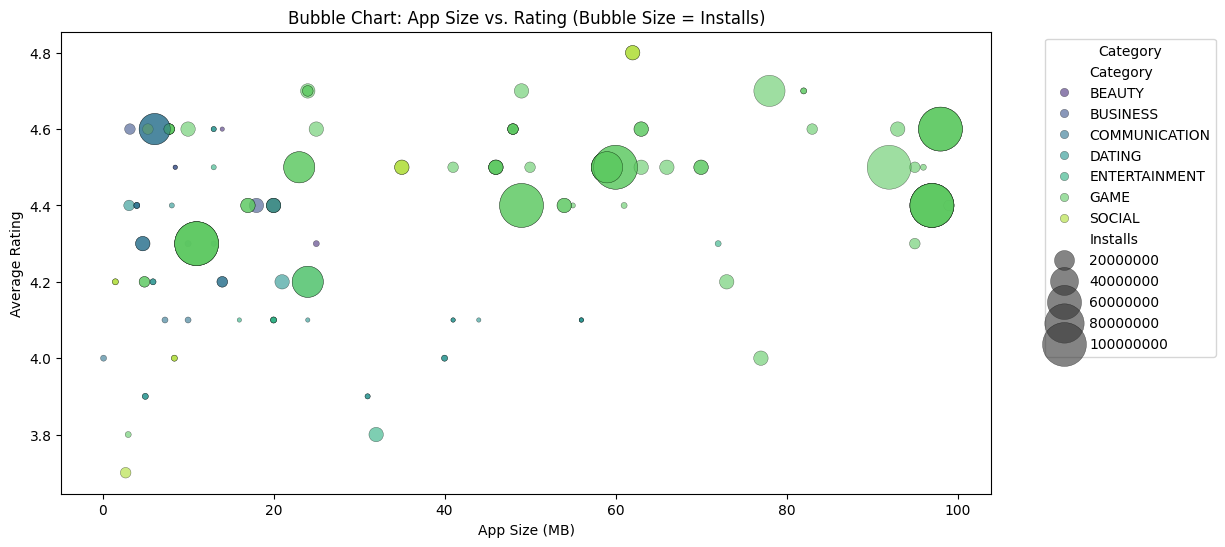

In [49]:
# task 7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
df = pd.read_csv("googleplaystore.csv.csv")  # Update filename if necessary

# Clean and convert numeric columns
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).replace('Free', np.nan).astype(float)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Handle 'Size' column
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace(r'[+,]', '', regex=True)  # Remove extra symbols

# Convert 'M' to float
df['Size'] = df['Size'].str.replace('M', '')

# Convert 'k' to MB (1 KB = 1/1024 MB)
df.loc[df['Size'].str.contains('k', na=False), 'Size'] = (
    df['Size'].str.replace('k', '').astype(float, errors='ignore') / 1024
)

# Convert to numeric
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Load user reviews dataset for sentiment analysis
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv.csv")

# Compute sentiment subjectivity
if 'Sentiment_Subjectivity' in reviews_df.columns:
    sentiment_subjectivity = reviews_df.groupby('App')['Sentiment_Subjectivity'].mean()
    df = df.merge(sentiment_subjectivity, on='App', how='left')
else:
    df['Sentiment_Subjectivity'] = np.nan  # Fallback if column is missing

# Filtering conditions
filtered_df = df[
    (df['Rating'] > 3.5) &
    (df['Category'].str.lower().isin(['game', 'beauty', 'business', 'comics', 'communication', 'dating', 'entertainment', 'social', 'event'])) &
    (df['Reviews'] > 500) &
    (df['Sentiment_Subjectivity'] > 0.5) &
    (df['Installs'] > 50000) &
    (df['Size'] > 0)  # Ensuring valid sizes
].copy()

# Function to check if current time is between 5 PM - 7 PM IST
def is_within_time_range():
    current_time = datetime.utcnow()  # UTC time
    ist_time = current_time + pd.Timedelta(hours=5, minutes=30)  # Convert to IST
    return 17 <= ist_time.hour < 19  # 5 PM to 7 PM IST

# Plot only if within the allowed time range
if is_within_time_range():
    plt.figure(figsize=(12, 6))

    # Bubble Chart
    sns.scatterplot(
        x=filtered_df['Size'],
        y=filtered_df['Rating'],
        size=filtered_df['Installs'],
        sizes=(10, 1000),
        alpha=0.6,
        hue=filtered_df['Category'],
        palette='viridis',
        edgecolor='black'
    )

    plt.title("Bubble Chart: App Size vs. Rating (Bubble Size = Installs)")
    plt.xlabel("App Size (MB)")
    plt.ylabel("Average Rating")
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("Bubble Chart is only available between 5 PM - 7 PM IST.")
